In [9]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.feature
import skimage.color
from tqdm import tqdm
from keras.datasets import cifar10
from sklearn.svm import LinearSVC
import os
import pickle

In [10]:
print('Loading cifar10..')
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

Loading cifar10..


Plotting..


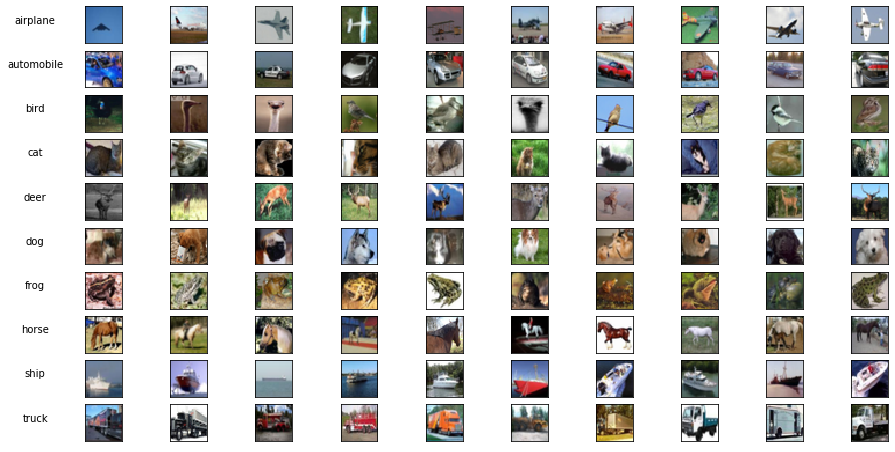

In [11]:
# A helper function for plotting sample images from dataset
def plot_images(images, labels, num_samples):
    cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    fig, axes = plt.subplots(num_samples,num_samples,figsize=(15,8))
    for row in range(num_samples):
        images_for_label = [img for img, label in zip(images, labels) if label == row]
        random_indices = np.random.choice(range(len(images_for_label)), num_samples, replace=False)
        for col, random_idx in enumerate(random_indices):
            axes[row][col].imshow(images_for_label[random_idx])
            axes[row][col].get_xaxis().set_ticks([])
            axes[row][col].get_yaxis().set_ticks([])
        axes[row][0].set_ylabel(cifar_classes[row], labelpad=50,  rotation=0)
    #plt.subplots_adjust(left=0.1, right=0.2)
    plt.savefig('cifar_sample', bbox_inches='tight')

print('Plotting..')
plot_images(X_train, Y_train, 10)

In [12]:
Y_train = Y_train.flatten()
Y_test = Y_test.flatten()

In [13]:
print('Extracting HoG features')

############################################################
# extract_features 함수 작성
# 참고 : image의 HOG feature를 추출하여 저장

def extract_features(data):
    data_hog = []
    

    
            
    return np.array(data_hog)

############################################################


X_train_features = extract_features(X_train)
X_test_features = extract_features(X_test)
print(X_train_features.shape) # (50000, 324)
print(X_test_features.shape) # (10000, 324)

Extracting HoG features
(50000, 324)
(10000, 324)


In [14]:
Y_train = Y_train.flatten()
Y_test = Y_test.flatten()

In [15]:
print('Training model')
model = LinearSVC(C=1e-10, verbose=True)
model.fit(X_train_features, Y_train)

Training model
[LibLinear]

LinearSVC(C=1e-10, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=True)

In [16]:
print('Train score', model.score(X_train_features, Y_train))
print('Test score', model.score(X_test_features, Y_test))

Train score 0.32876
Test score 0.325
